In [1]:
import yaml
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
print(torch.__version__)
print(torchaudio.__version__)

2.3.0+cu121
2.3.0+cu121


In [3]:
raw_path = 'data/raw'
cmap = 'Greys'

In [4]:
cache = yaml.safe_load(open('data.yaml'))

**Some files are in different samples rates:**

In [5]:
metadata = torchaudio.info(f'{raw_path}/541.mp3')
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=174883930, num_channels=2, bits_per_sample=0, encoding=MP3)


In [6]:
metadata = torchaudio.info(f'{raw_path}/542.mp3')
print(metadata)

AudioMetaData(sample_rate=48000, num_frames=6916608, num_channels=2, bits_per_sample=0, encoding=MP3)


**Episode with minimum duration:**

In [7]:
sorted(cache, key=lambda x: cache[x]['duration'])[0]

742

In [8]:
cache[742]

{'day': 22,
 'dow': 'Friday',
 'month': 'Dec',
 'year': 2023,
 'title': 'SDS 742: Happy Holidays from All of Us',
 'duration': 2,
 'link': 'https://www.youtube.com/embed/1dZ2qX-Yc9Y',
 'stats': 7.7}

# `742`

In [9]:
episode = 742

In [10]:
metadata = torchaudio.info(f'{raw_path}/{episode}.mp3')
print(metadata)

AudioMetaData(sample_rate=48000, num_frames=6441984, num_channels=2, bits_per_sample=0, encoding=MP3)


In [11]:
waveform, sample_rate = torchaudio.load(f'{raw_path}/{episode}.mp3')

In [12]:
waveform.shape

torch.Size([2, 6441984])

In [13]:
waveform = waveform.mean(dim=0)  # make mono from stereo by averaring

In [14]:
waveform.shape

torch.Size([6441984])

In [15]:
Audio(waveform[:waveform.shape[0] // 10], rate=sample_rate)

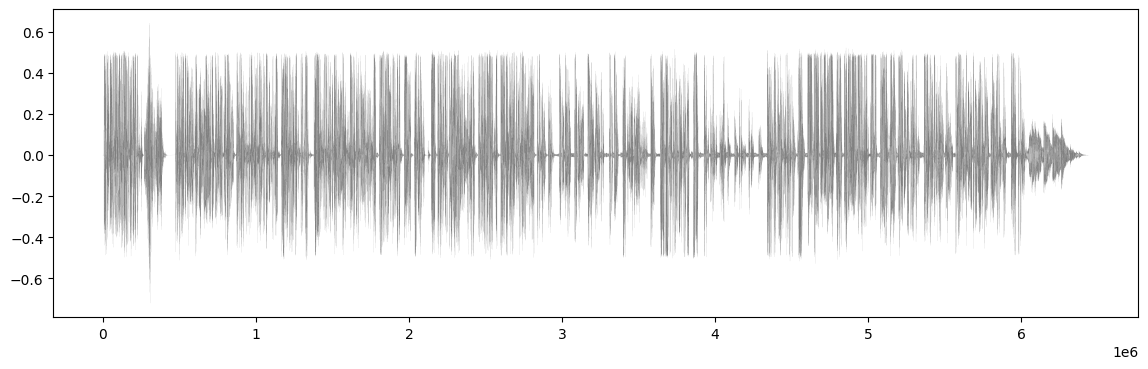

In [16]:
plt.figure(figsize=(14, 4))
plt.plot(waveform.numpy(), ls='--', color='grey', lw=0.05)

In [17]:
spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=sample_rate,
    hop_length=sample_rate // 2,
    n_mels=128
)

In [18]:
s = spectrogram(waveform)

In [19]:
s.shape

torch.Size([128, 269])

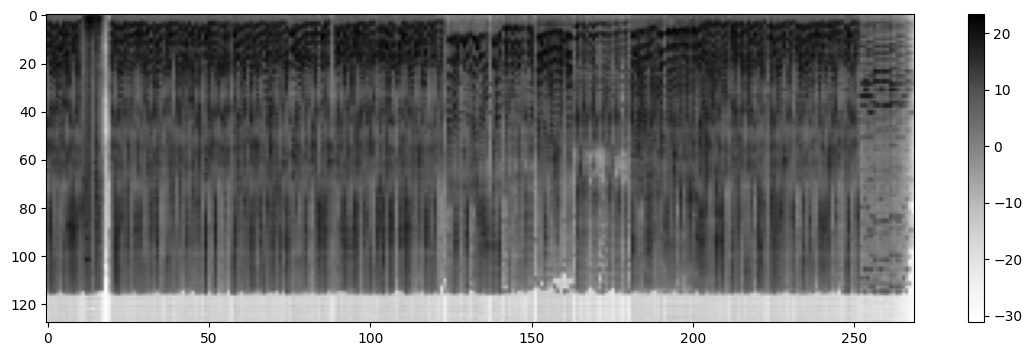

In [20]:
plt.figure(figsize=(14, 4))
plt.imshow(s.log2().numpy(), aspect='auto', cmap=cmap)
plt.colorbar()

**+ `AmplitudeToDB`**

In [21]:
a2db = T.AmplitudeToDB(top_db=80)

In [22]:
s = a2db(s)

In [23]:
s.shape

torch.Size([128, 269])

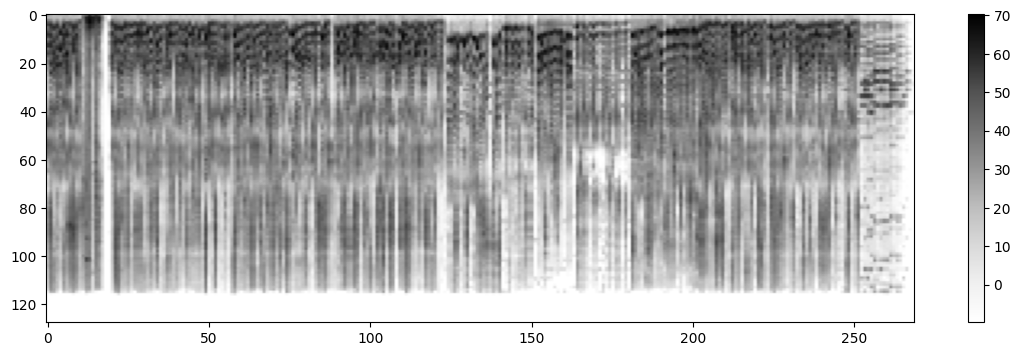

In [24]:
plt.figure(figsize=(14, 4))
plt.imshow(s.numpy(), aspect='auto', cmap=cmap)
plt.colorbar()

# Saving

In [25]:
from utils.spectrograms import get_spectrogram

In [ ]:
for episode in cache:
    print('.', end='')
    waveform, sample_rate = torchaudio.load(f'{raw_path}/{episode}.mp3')
    #
    s = get_spectrogram(waveform.mean(dim=0), sample_rate, 'melspectrogram')
    #
    plt.figure(figsize=(3, 1))
    plt.imsave(
        f'data/melspectrogram/{episode}.png',
        s.numpy(),
        cmap=cmap,
    )
    plt.close()

..........................................